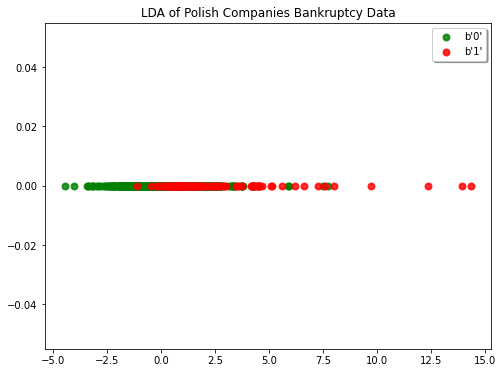

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

# Load the ARFF file
data = arff.loadarff('polish_data/5year.arff')
df = pd.DataFrame(data[0])
df = df.dropna()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Label encoding for the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply Linear Discriminant Analysis (LDA) with a single component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

colors = ['green', 'red']
lw = 2

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1], le.classes_):
    plt.scatter(X_lda[y == i, 0], np.zeros_like(X_lda[y == i, 0]), color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=True, scatterpoints=1)
plt.title('LDA of Polish Companies Bankruptcy Data')

plt.show()